In [1]:
import pandas as pd
import matplotlib.pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
data = df['pH']

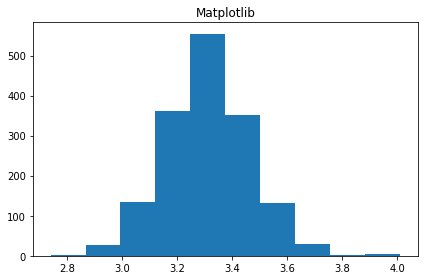

In [4]:
plt.hist(data)
plt.title('Matplotlib')
plt.tight_layout()

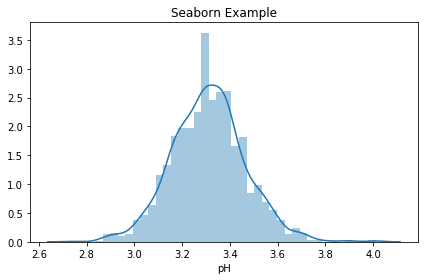

In [5]:
sns.distplot(
    data,
    kde=True,
    hist=True,
    rug=False
)
plt.title('Seaborn Example')
plt.tight_layout()

In [6]:
from scipy.stats import pearsonr
def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top right hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'{r:.2f}', xy=(.85, .9), xycoords=ax.transAxes, fontsize=14)

## Seaborn Example (more complex)

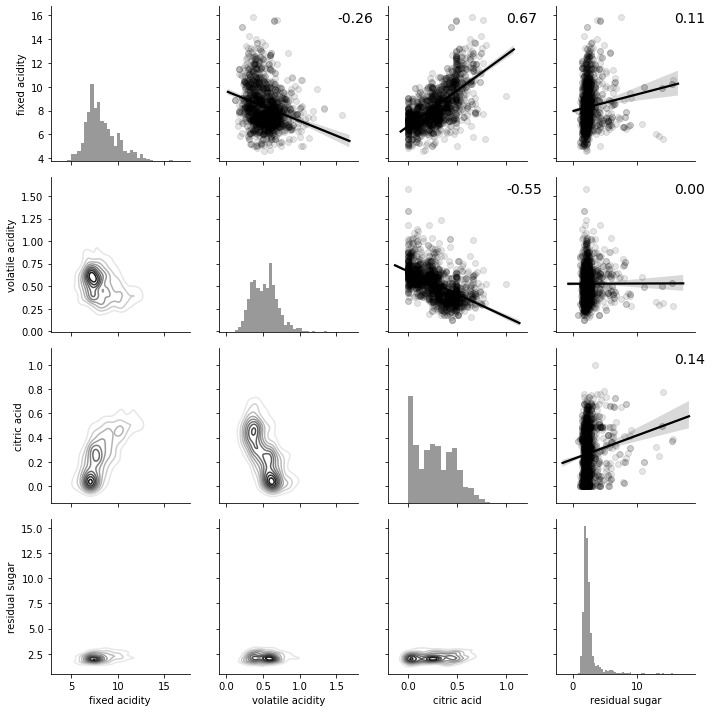

In [21]:
grid = sns.PairGrid(data=df, vars=df.columns.tolist()[:4])
grid = grid.map_upper(sns.regplot, color='black', scatter_kws={'alpha': 0.1})
grid = grid.map_upper(corrfunc)
grid = grid.map_lower(sns.kdeplot, cmap='binary')
grid = grid.map_diag(sns.distplot, kde=False, rug=False, color='black')
plt.tight_layout()

In [8]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [23]:
from bokeh.layouts import gridplot
#x = list(range(11))
#y0, y1, y2 = x, [10-i for i in x], [abs(i-5) for i in x]
x = df['citric acid']
y0 = df['fixed acidity']
y1 = df['pH']
y2 = df['residual sugar']

plot_options = dict(width=250, plot_height=250, tools='pan,wheel_zoom')

# create a new plot
s1 = figure(**plot_options)
s1.circle(x, y0, size=10, color="navy")

# create a new plot and share both ranges
s2 = figure(x_range=s1.x_range, y_range=s1.y_range, **plot_options)
s2.triangle(x, y1, size=10, color="firebrick")

# create a new plot and share only one range
s3 = figure(x_range=s1.x_range, **plot_options)
s3.square(x, y2, size=10, color="olive")

p = gridplot([[s1, s2, s3]])

# show the results
show(p)

In [24]:
from bokeh.models import ColumnDataSource

#x = list(range(-20, 21))
#y0, y1 = [abs(xx) for xx in x], [xx**2 for xx in x]

x = df['citric acid']
y0 = df['fixed acidity']
y1 = df['pH']

# create a column data source for the plots to share
source = ColumnDataSource(data=dict(x=x, y0=y0, y1=y1))

TOOLS = "box_select,lasso_select"

# create a new plot and add a renderer
left = figure(tools=TOOLS, width=300, height=300)
left.circle('x', 'y0', source=source)

# create another new plot and add a renderer
right = figure(tools=TOOLS, width=300, height=300)
right.circle('x', 'y1', source=source)

p = gridplot([[left, right]])

show(p)

In [26]:
from bokeh.models import HoverTool

source = ColumnDataSource(
        data=dict(
            x=[1, 2, 3, 4, 5],
            y=[2, 5, 8, 2, 7],
            desc=['A', 'b', 'C', 'd', 'E'],
        )
    )

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("desc", "@desc"),
        ]
    )

p = figure(plot_width=300, plot_height=300, tools=[hover], title="Mouse over the dots")

p.circle('x', 'y', size=20, source=source)

show(p)

In [12]:
from bokeh.layouts import widgetbox
from bokeh.models.widgets import Slider


slider = Slider(start=0, end=10, value=1, step=.1, title="foo")

show(widgetbox(slider))

In [13]:
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, Slider

x = [x*0.005 for x in range(0, 201)]

source = ColumnDataSource(data=dict(x=x, y=x))

plot = figure(plot_width=400, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

slider = Slider(start=0.1, end=6, value=1, step=.1, title="power")

update_curve = CustomJS(args=dict(source=source, slider=slider), code="""
    var data = source.data;
    var f = slider.value;
    x = data['x']
    y = data['y']
    for (i = 0; i < x.length; i++) {
        y[i] = Math.pow(x[i], f)
    }
    
    // necessary becasue we mutated source.data in-place
    source.change.emit();
""")
slider.js_on_change('value', update_curve)


show(column(slider, plot))

In [14]:
from bokeh.layouts import column
from bokeh.models import TextInput, Button, Paragraph

def modify_doc(doc):
    
    # create some widgets
    button = Button(label="Say HI")
    input = TextInput(value="Bokeh")
    output = Paragraph()

    # add a callback to a widget
    def update():
        output.text = "Hello, " + input.value
    button.on_click(update)

    # create a layout for everything
    layout = column(button, input, output)

    # add the layout to curdoc
    doc.add_root(layout)
    
# In the notebook, just pass the function that defines the app to show
# You may need to supply notebook_url, e.g notebook_url="http://localhost:8889" 
show(modify_doc)

In [27]:
from numpy.random import random

from bokeh.layouts import column, row
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Select, TextInput

def get_data(N):
    return dict(x=random(size=N), y=random(size=N), r=random(size=N) * 0.03)

COLORS = ["black", "firebrick", "navy", "olive", "goldenrod"]

def modify_doc(doc):
    source = ColumnDataSource(data=get_data(200))

    p = figure(tools="", toolbar_location=None)
    r = p.circle(x='x', y='y', radius='r', source=source,
                 color="navy", alpha=0.6, line_color="white")

    
    select = Select(title="Color", value="navy", options=COLORS)
    input = TextInput(title="Number of points", value="200")

    def update_color(attrname, old, new):
        r.glyph.fill_color = select.value
    select.on_change('value', update_color)

    def update_points(attrname, old, new):
        N = int(input.value)
        source.data = get_data(N)
    input.on_change('value', update_points)

    layout = column(row(select, input, width=400), row(p))

    doc.add_root(layout)

show(modify_doc)

In [16]:
from math import cos, sin

from bokeh.models import ColumnDataSource

def modify_doc(doc):
    p = figure(match_aspect=True)
    p.circle(x=0, y=0, radius=1, fill_color=None, line_width=2)
    
    # this is just to help the auto-datarange
    p.rect(0, 0, 2, 2, alpha=0)

    # this is the data source we will stream to
    source = ColumnDataSource(data=dict(x=[1], y=[0]))
    p.circle(x='x', y='y', size=12, fill_color='white', source=source)

    def update():
        x, y = source.data['x'][-1], source.data['y'][-1]

        # construct the new values for all columns, and pass to stream
        new_data = dict(x=[x*cos(0.1) - y*sin(0.1)], y=[x*sin(0.1) + y*cos(0.1)])
        source.stream(new_data, rollover=8)

    doc.add_periodic_callback(update, 150)
    doc.add_root(p)
    
show(modify_doc)